In [62]:
import pandas as pd
import numpy as np
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt

In [20]:
collisions = pd.read_csv('collisions.csv')
collisions = collisions[(collisions.BOROUGH=='BROOKLYN')]
collisions.shape

C:\Users\medco\AppData\Local\Temp\ipykernel_32252\1047460346.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions = pd.read_csv('collisions.csv')


(433218, 29)

In [22]:
collisions = collisions.dropna(subset=['LATITUDE','LONGITUDE'], how = 'all')
collisions.shape

(423402, 29)

In [23]:
collisions.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [34]:
cyclists_injured = collisions[collisions['NUMBER OF CYCLIST INJURED']>0]
cyclists_killed = collisions[collisions['NUMBER OF CYCLIST KILLED']>0]
print(cyclists_injured.shape)
print(cyclists_killed.shape)

(15076, 29)
(55, 29)


In [28]:
cyclists_injured.to_csv('cyclists_injured.csv')
cyclists_killed.to_csv('cyclists_killed.csv')

In [109]:
cyc_inj_group = cyclists_injured.groupby(by='ZIP CODE').agg({'NUMBER OF CYCLIST INJURED':'count'}).reset_index()
topZipCycInj = cyc_inj_group.sort_values(by='NUMBER OF CYCLIST INJURED', ascending=False).iloc[0:10]
topZipCycInj['ZIP CODE'] = topZipCycInj['ZIP CODE'].astype('int64')

topZipsInj = list(topZipCycInj['ZIP CODE'].unique())
# topZipsInj

In [101]:
with zipfile.ZipFile("ZIP_CODE_040114.zip","r") as zip_ref:
    zip_ref.extractall()

nyc = gpd.read_file('ZIP_CODE_040114.shp', crs=4326)
nyc['ZIPCODE'] = nyc['ZIPCODE'].astype('int64')

In [110]:
# cycZipsInj = nyc[nyc['ZIPCODE'].isin(topZipsInj)]

# fig, ax = plt.subplots(figsize = (15,10))
# nyc[nyc.COUNTY=='Kings'].plot(ax=ax,facecolor='lightgrey', edgecolor='grey')
# cycZipsInj.plot(ax=ax, facecolor='lightblue', edgecolor='k')
# plt.show()

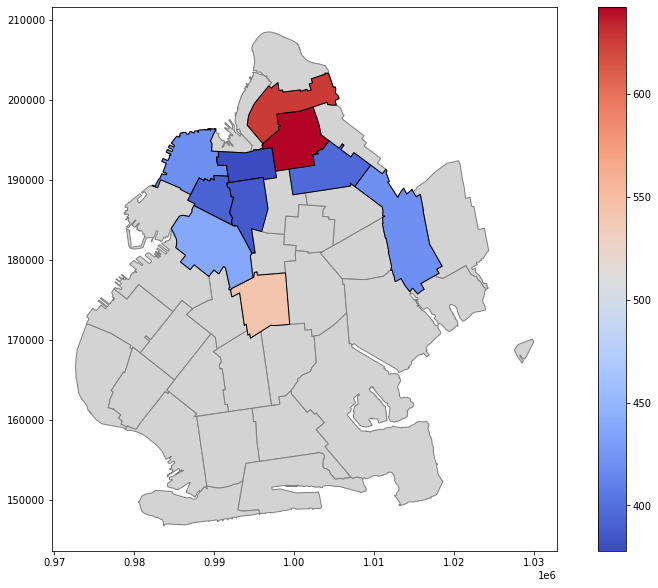

In [103]:
topZipMapInj = topZipCycInj.merge(cycZipsInj, left_on='ZIP CODE', right_on='ZIPCODE', how='right')
topZipMapInj = gpd.GeoDataFrame(topZipMapInj, geometry='geometry', crs=4326)

fig, ax = plt.subplots(figsize = (15,10))
nyc[nyc.COUNTY=='Kings'].plot(ax=ax,facecolor='lightgrey', edgecolor='grey')
topZipMapInj.plot(column = 'NUMBER OF CYCLIST INJURED', ax=ax, cmap = 'coolwarm', legend=True, edgecolor='k')
plt.show()

In [113]:
cyc_kill_group = cyclists_killed.groupby(by='ZIP CODE').agg({'NUMBER OF CYCLIST KILLED':'count'}).reset_index()
topZipCycKill = cyc_kill_group.sort_values(by='NUMBER OF CYCLIST KILLED', ascending=False).iloc[0:10]
topZipCycKill['ZIP CODE'] = topZipCycKill['ZIP CODE'].astype('int64')

topZipsKill = list(topZipCycKill['ZIP CODE'].unique())
# topZipsKill

In [114]:
cycZipsKill = nyc[nyc['ZIPCODE'].isin(topZipsKill)]

# fig, ax = plt.subplots(figsize = (15,10))
# nyc[nyc.COUNTY=='Kings'].plot(ax=ax,facecolor='lightgrey', edgecolor='grey')
# cycZipsKill.plot(ax=ax, facecolor='lightblue', edgecolor='k')
# plt.show()

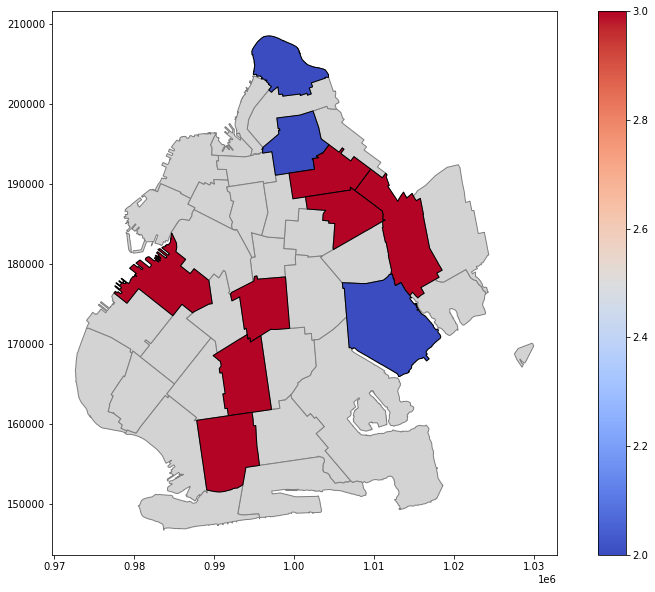

In [115]:
topZipMapKill = topZipCycKill.merge(cycZipsKill, left_on='ZIP CODE', right_on='ZIPCODE', how='right')
topZipMapKill = gpd.GeoDataFrame(topZipMapKill, geometry='geometry', crs=4326)

fig, ax = plt.subplots(figsize = (15,10))
nyc[nyc.COUNTY=='Kings'].plot(ax=ax,facecolor='lightgrey', edgecolor='grey')
topZipMapKill.plot(column = 'NUMBER OF CYCLIST KILLED', ax=ax, cmap = 'coolwarm', legend=True, edgecolor='k')
plt.show()